### minist 数据集回顾
是机器学习领域的一个经典数据集，其历史几乎和这 个领域一样长，而且已被人们深入研究
#### 经典6+1（万）
这个数据集包含 60 000 张训练图像和 10 000 张测试图像
####
图像被编码为 Numpy 数组，而标签是数字数组

In [54]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

print(train_images[1])
print(train_labels[1])
print(train_images.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

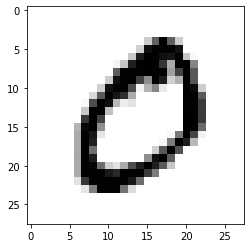

In [56]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

In [57]:
# 一个简单的卷积神经网络。它是 Conv2D 层和 MaxPooling2D 层的堆叠
from keras import models
from keras import layers

model = models.Sequential()
# 卷积神经网络接收形状为 (image_height, image_width, image_channels) 的输入张量
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
model.summary()
# 第一个卷积层接收一个大小为 (28, 28, 1) 的特征图，并输出一个大 小为 (26, 26, 32) 的特征图,
# 即它在输入上计算 32 个过滤器,每个 通道都包含一个 26×26 的数值网格，它是过滤器对输入的响应图（response map）,
# 表示这个过 滤器模式在输入中不同位置的响应

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


每个 Conv2D 层和 MaxPooling2D 层的输出都是一个形状为 (height, width, channels) 的3D 张量

宽度和高度两个维度的尺寸通常会随着网络加深而变小

通道数量由传 入 Conv2D 层的第一个参数所控制（32 或64）

下一步是将最后的输出张量［大小为 (3, 3, 64)］输入到一个密集连接分类器网络中， 即 Dense 层的堆叠

这些分类器可以处理 1D 向量，而当前的输出是 3D 张量。 首先，我们需要将 3D 输出展平为 1D，然后在上面添加几个 Dense 层

In [58]:
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                36928     
__________

在进入两个 Dense 层之前，形状 (3, 3, 64) 的输出被展平为形状 (576,) 的 向量

下面我们在MNIST 数字图像上训练这个卷积神经网络

In [59]:
from keras.datasets import mnist
from keras.utils import to_categorical


train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28,1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 32s 528us/step - loss: 0.1753 - acc: 0.9457
Epoch 2/5
60000/60000 [==============================] - 32s 530us/step - loss: 0.0474 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 31s 521us/step - loss: 0.0330 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 32s 534us/step - loss: 0.0249 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 32s 533us/step - loss: 0.0194 - acc: 0.9940


In [60]:
# 在测试数据上对模型进行评估
test_loss,test_acc = model.evaluate(test_images,test_labels)
test_acc

10000/10000 [==============================] - 2s 186us/step


0.9916